# INTRODUCTION

This project aims at analyzing real estate data of Saudi Arabia, building a model that predicts price of villas in Saudi Arabia. The model will be built using Ridge regression model.

The dataset was gotten from Kaggle (https://www.kaggle.com/datasets/maha48/villas-price-dataset)

In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error #performance metrics
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer #missing values
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder

## Prepare Data

In [2]:
# read the files

train = pd.read_csv('datasets/train_data.csv')
test = pd.read_csv('datasets/test_data (saudi_villa).csv')

print(train.shape)
test.shape

(1417, 11)


(930, 10)

### DATA WRANGLING / EDA

In [3]:
train.head()

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden
0,1300000.0,Al Munsiyah,Riyadh,East Riyadh,4,5,240.0,0,0,0,0
1,2500000.0,Al Murjan,Makkah,Jeddah,5,4,309.0,0,1,0,0
2,1300000.0,Ar Rimal,Riyadh,East Riyadh,5,5,300.0,0,0,0,0
3,1550000.0,Az Zomorod,Makkah,Jeddah,6,6,312.0,0,0,0,0
4,1000000.0,Ash Shifa,Riyadh,South Riyadh,4,3,300.0,0,0,0,0


In [4]:
test.head()

,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,pool,driver,garden
0,Az Zomorod,Makkah Al Mukarramah,Jeddah,6,6,312.0,1,0,0,0
1,Al Manarat,Makkah Al Mukarramah,Jeddah,6,5,275.0,1,1,0,0
2,Az Zomorod,Makkah Al Mukarramah,Jeddah,7,6,350.0,1,1,0,0
3,Al Wahah,Makkah Al Mukarramah,Jeddah,5,3,135.0,0,0,1,0
4,Tuwaiq,Ar Riyadh,West Riyadh,4,7,250.0,0,0,0,0


**observation**

wrong name; bool 

In [5]:
train = train.rename(columns = {'bool':'pool'})

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1417 non-null   float64
 1   neighborhood_name    1417 non-null   object 
 2   administritive_area  1396 non-null   object 
 3   city                 1417 non-null   object 
 4   rooms                1417 non-null   int64  
 5   bathrooms            1417 non-null   int64  
 6   sqm                  1417 non-null   float64
 7   elevator             1417 non-null   int64  
 8   pool                 1417 non-null   int64  
 9   driver               1417 non-null   int64  
 10  garden               1417 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 121.9+ KB


In [7]:
#check proportion of missing value
train.isnull().sum()/len(train)

price                  0.00000
neighborhood_name      0.00000
administritive_area    0.01482
city                   0.00000
rooms                  0.00000
bathrooms              0.00000
sqm                    0.00000
elevator               0.00000
pool                   0.00000
driver                 0.00000
garden                 0.00000
dtype: float64

**observation**
- The dataset does not contain so much missing value and so ca be filled 

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1417.0,1.953098e+06,5.369451e+06,111.0,1050000.0,1300000.0,1750000.0,160000000.0
rooms,1417.0,4.708539e+00,1.198701e+00,1.0,4.0,5.0,5.0,7.0
bathrooms,1417.0,5.143260e+00,1.341935e+00,1.0,4.0,5.0,6.0,7.0
sqm,1417.0,9.178243e+02,1.467815e+04,22.0,268.0,312.0,390.0,420000.0
elevator,1417.0,2.208892e-01,4.461556e-01,0.0,0.0,0.0,0.0,4.0
pool,1417.0,1.390261e-01,3.773344e-01,0.0,0.0,0.0,0.0,3.0
driver,1417.0,1.482004e-01,3.613357e-01,0.0,0.0,0.0,0.0,2.0
garden,1417.0,3.528582e-02,1.920667e-01,0.0,0.0,0.0,0.0,2.0


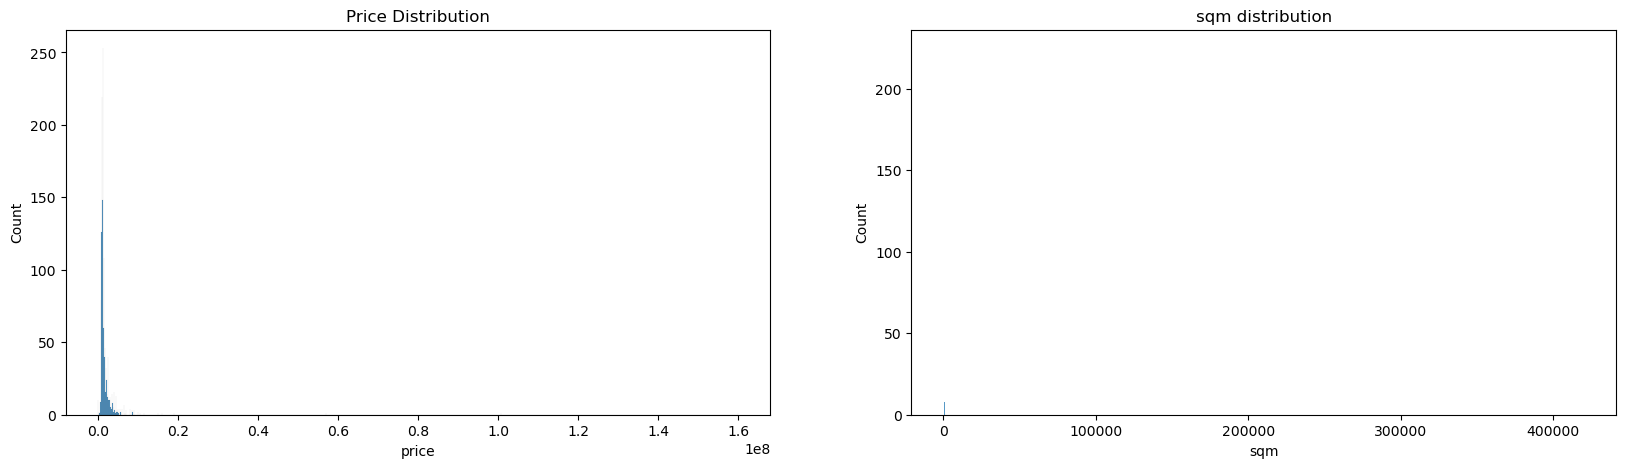

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sb.histplot(data = train, x = 'price', ax=ax[0])
ax[0].set_title('Price Distribution')
sb.histplot(data = train, x = 'sqm', ax=ax[1])
ax[1].set_title('sqm distribution');

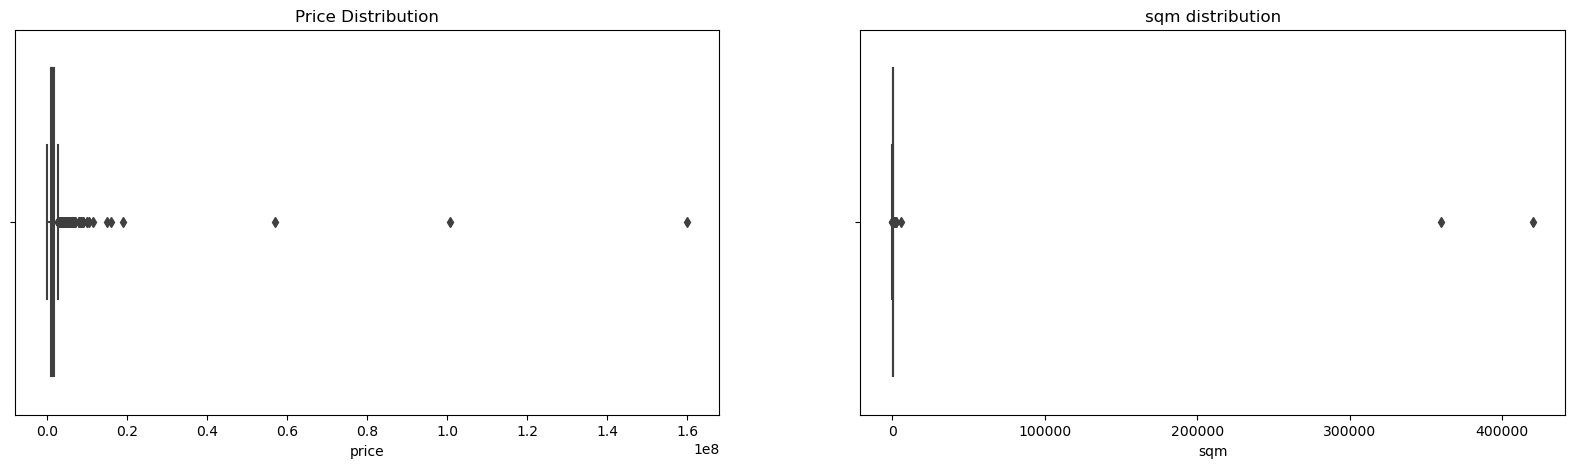

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sb.boxplot(data = train, x = 'price', ax=ax[0])
ax[0].set_title('Price Distribution')
sb.boxplot(data = train, x = 'sqm', ax=ax[1])
ax[1].set_title('sqm distribution');

**Observation**
- price and sqm has lots of outliers

In [11]:
mini,maxi = train['sqm'].quantile([0.1,0.9]).round(2)
mini1,maxi2 = train['price'].quantile([0.1,0.9]).round(2)
print(f'sqm min, max; {mini, maxi}')
print(f'print min, max; {mini1, maxi2}')

sqm min, max; (227.0, 504.8)
print min, max; (900000.0, 3000000.0)


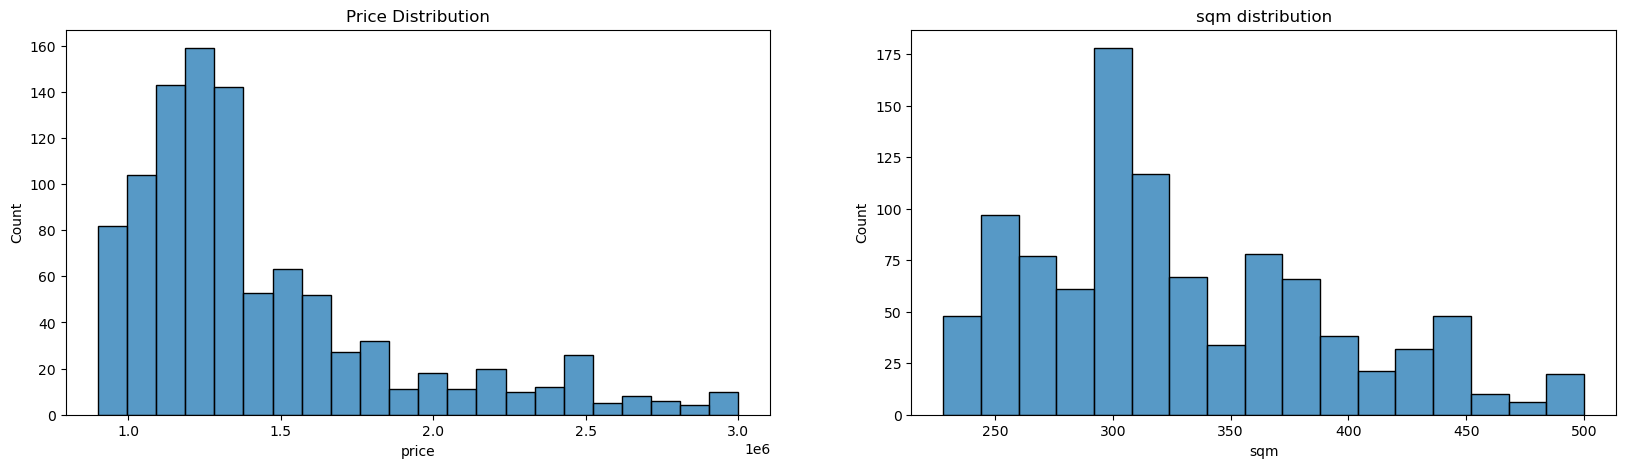

In [12]:
train = train[train['price'].between(mini1,maxi2)]
train = train[train['sqm'].between(mini,maxi)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sb.histplot(data = train, x = 'price', ax=ax[0])
ax[0].set_title('Price Distribution')
sb.histplot(data = train, x = 'sqm', ax=ax[1])
ax[1].set_title('sqm distribution');

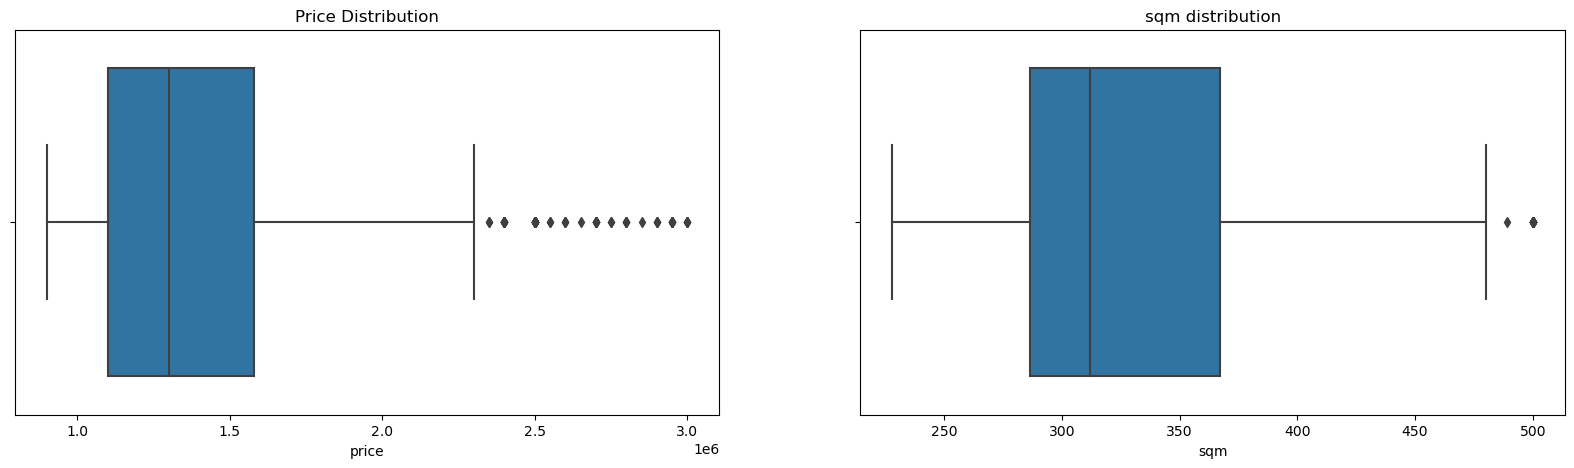

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sb.boxplot(data = train, x = 'price', ax=ax[0])
ax[0].set_title('Price Distribution')
sb.boxplot(data = train, x = 'sqm', ax=ax[1])
ax[1].set_title('sqm distribution');

<AxesSubplot:>

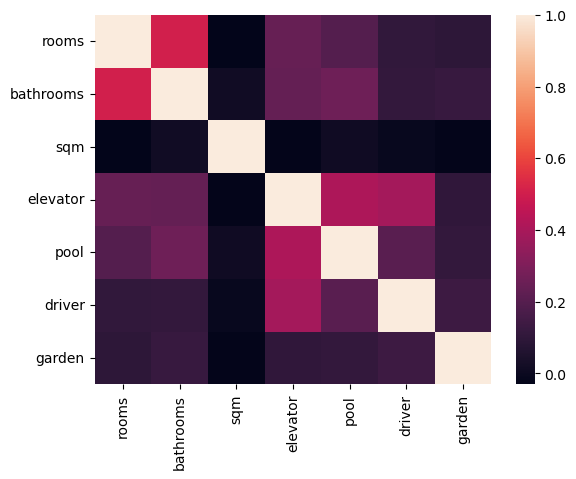

In [14]:
#check for multiple colinearity

corr = sb.heatmap(train.select_dtypes('number').drop(columns = 'price').corr());
corr

In [15]:
#check for low and high cardinality
train.select_dtypes('object').nunique()

neighborhood_name      93
administritive_area     2
city                   11
dtype: int64

In [16]:
train.select_dtypes('number').nunique()

price         92
rooms          7
bathrooms      7
sqm          137
elevator       3
pool           4
driver         3
garden         3
dtype: int64

**observation**
- No multiple-colinearity detected
- I will like to explore administrative_area a bit more

In [17]:
lists = ['elevator','pool','driver','garden']
for x in lists:
    print(f'{x} values: {train[x].unique()}')

elevator values: [0 1 2]
pool values: [0 1 3 2]
driver values: [0 1 2]
garden values: [0 1 2]


**observation**

- the columns above are supposed to contain only 0 and 1 

In [18]:
def wrangle(df):
    lists = ['elevator','pool','driver','garden']
    for x in lists:
        df = df[df[x] <= 1]
    return df

In [19]:
train = wrangle(train)

In [20]:
lists = ['elevator','pool','driver','garden']
for x in lists:
    print(f'{x} values: {train[x].unique()}')

elevator values: [0 1]
pool values: [0 1]
driver values: [0 1]
garden values: [0 1]


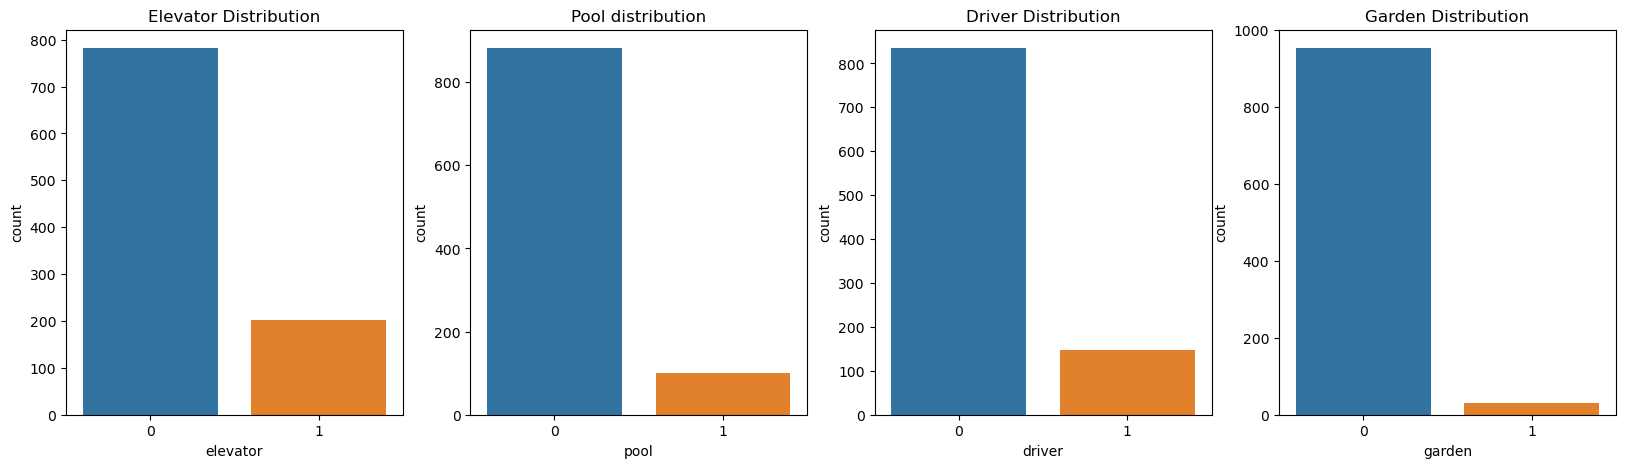

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sb.countplot(data = train, x ='elevator', ax=ax[0])
ax[0].set_title('Elevator Distribution')
sb.countplot(data = train, x ='pool', ax=ax[1])
ax[1].set_title('Pool distribution')
sb.countplot(data = train, x ='driver', ax=ax[2])
ax[2].set_title('Driver Distribution')
sb.countplot(data = train, x ='garden', ax=ax[3])
ax[3].set_title('Garden Distribution');

In [22]:
train.shape

(983, 11)

#### More Visualization

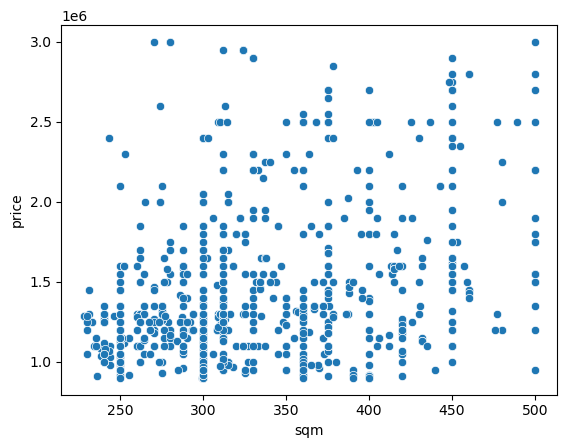

In [23]:
sb.scatterplot(x= train.sqm, y= train.price);

In [24]:
train['price'].corr(train['sqm'])

0.35308888265494076

**Observation**
- there is a slight positive correlation between price and sqm

correlation: 0.39324250460872906


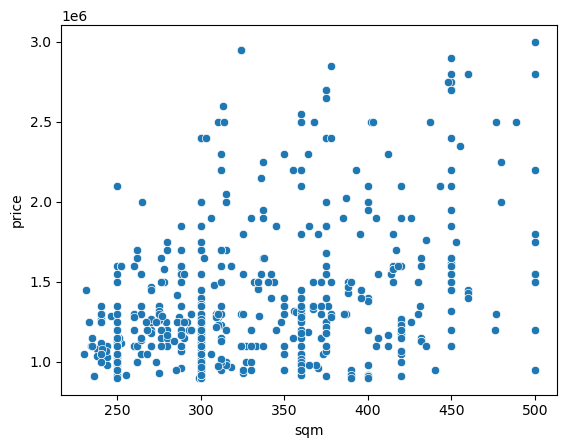

In [25]:
admin = train[train['administritive_area']== 'Riyadh']
sb.scatterplot(x= admin.sqm, y= admin.price);
corr = admin['price'].corr(admin['sqm'])
print(f'correlation: {corr}')

correlation: 0.2716879143826019


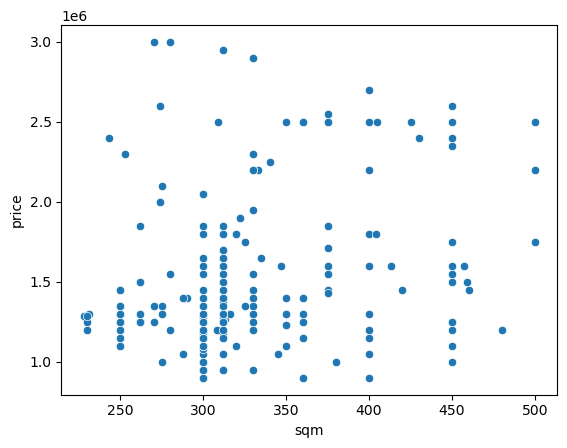

In [26]:
admin1 = train[train['administritive_area']== 'Makkah']
sb.scatterplot(x= admin1.sqm, y= admin1.price);
corr = admin1['price'].corr(admin1['sqm'])
print(f'correlation: {corr}')

**Observation**
- Villa prices in Riyadh is more dependent on area than those Makkah

###### Split Data
- I would split the train dataset 80% - 20% to test my model before passing the test data

In [27]:
train_train, train_test = train_test_split(train, test_size=0.2)
print(f'train sample contains, {train_train.shape}')
print(f'test sample contains, {train_test.shape}')

train sample contains, (786, 11)
test sample contains, (197, 11)


In [28]:
#split data 
features = ['neighborhood_name','administritive_area', 'city', 'rooms', 'bathrooms', 'sqm', 'elevator','pool', 'driver','garden']
target = 'price'
X_train = train_train[features]
y_train = train_train[target]
X1_test = train_test[features]
y1_test = train_test[target]

## Build Model

##### Baseline

In [29]:
y_mean = round(y_train.mean())
y_pred_baseline = [y_mean]*len(y_train)
mae_baseline = round(mean_absolute_error(y_train,y_pred_baseline))
mae_baseline

337212

###### Iterate


In [30]:
model = make_pipeline(OneHotEncoder(use_cat_names=True),
                      SimpleImputer(),
                      Ridge())

In [31]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood_name', 'administritive_area',
                                     'city'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [32]:
check_is_fitted(model)

In [33]:
y_pred_training = pd.Series(model.predict(X_train))
mae_training = round(mean_absolute_error(y_train,y_pred_training))
mae_training

132481

In [34]:
y_pred_test = pd.Series(model.predict(X1_test))
mae_test = round(mean_absolute_error(y1_test,y_pred_test))
mae_test 

152686

## Communicate Results

In [35]:
coefficients = model.named_steps['ridge'].coef_.round()
feature_names = model.named_steps['onehotencoder'].get_feature_names_out()
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp = feat_imp.sort_values(key = abs, ascending = False)
feat_imp

neighborhood_name_Al Muhammadiyah       843144.0
neighborhood_name_Abhur Al Janubiyah    802433.0
neighborhood_name_Al Masarah            713317.0
neighborhood_name_Ghirnatah             588280.0
neighborhood_name_Ash Shati             586993.0
                                          ...   
neighborhood_name_Al Maizilah            -2869.0
sqm                                       2206.0
neighborhood_name_Al Khalij              -1741.0
neighborhood_name_At Tahliyah              682.0
neighborhood_name_Namar                     11.0
Length: 110, dtype: float64

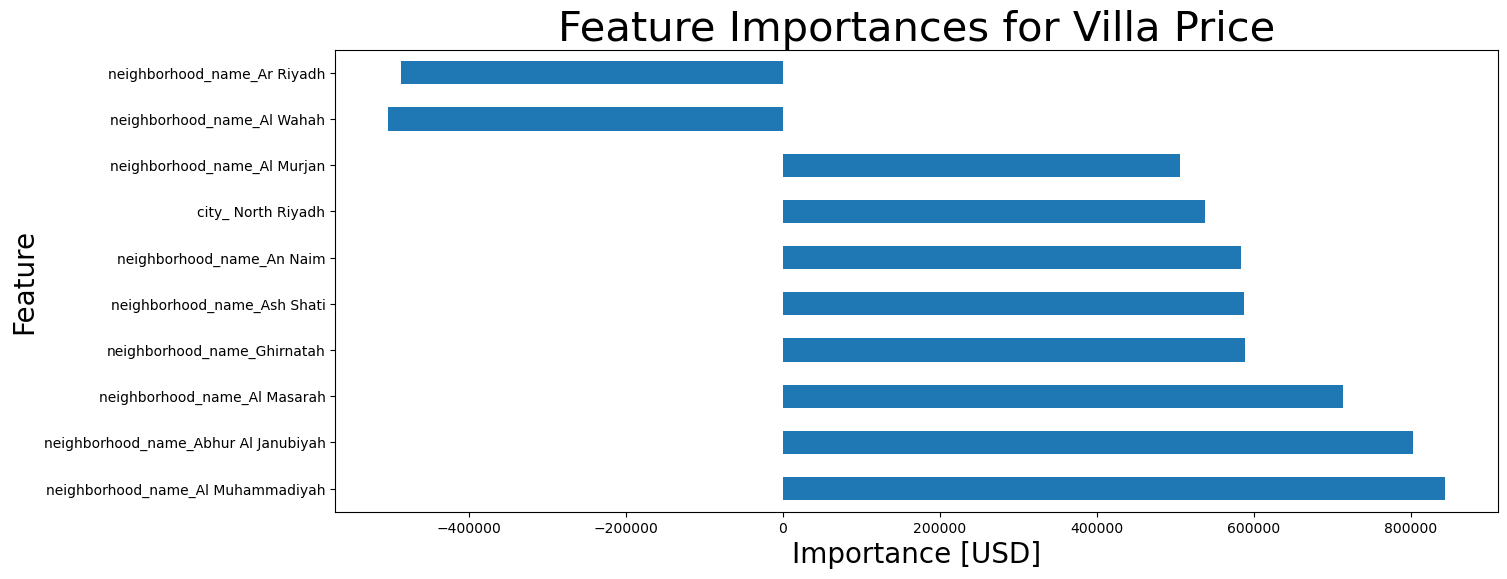

In [36]:
plt.figure(figsize = (15,6))
feat_imp.head(10).plot(kind = 'barh')
plt.xlabel('Importance [USD]', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('Feature Importances for Villa Price', fontsize= 30);

**Conclusion**

The neighborhood where the villa is located greatly affects the pricing of that villa. Villas in North Riyadh city are generally more expensive.